In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

light attenuation via Beer-Lambert

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


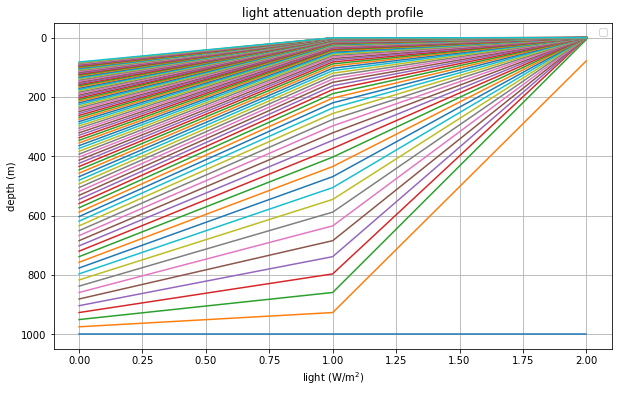

In [47]:
# constants for the Beer-Lambert Law
I0 = 10**3  # incident surface light (W/m^2)
k = 0.1    # attenuation coefficient (m^-1)
depths = np.linspace(0, 25, 100) # meters
alpha = 2e-5
I_threshold = 200 # assumed minimal solar input for growth => critical depth

# algae profiles (cells/m^3)
densities = {
    'no_bloom': 0,
    'lo_bloom': 1e4,
    'hi_bloom': 5e5
}

def calc_attenuation(cell_density, k, alpha):
    '''Given a cell density (cells/m^3), a proportionality constant alpha, and the attenuation coefficient k for light in cell-free water, return the adjusted attenuation coefficient for cells.'''
    
    return k + (alpha * cell_density)

def calc_depth_intercept(I_thresh, I0, k):
    '''Return the critical depth for algal growth given a depth profile for light attenuation and a minimum threshold light value.'''
    return -np.log(I_thresh / I0) / k


def plot_depth_profiles(depths, densities, k, alpha, I0, I_threshold):
    '''Given a dict of cell densities, plot their respective light profiles and critical depths.'''
    
    profiles = {}
    
    for key, val in densities.items():
        label = key
        k_adj = calc_attenuation(val, k, alpha)
        I = I0 * np.exp(-k_adj * depths)
        critical_depth = calc_depth_intercept(I_threshold, I0, k_adj)
        
        profiles[label] = I
        
    plt.figure(figsize=(10,6))
    plt.plot(profiles.values())
    
    plt.gca().invert_yaxis()  # Invert y-axis to show depth increasing downwards

    plt.title('light attenuation depth profile')
    plt.xlabel('light (W/m$^2$)')
    plt.ylabel('depth (m)')
    plt.legend()
    plt.grid(True)    
       
    
plot_depth_profiles(depths, densities, k, alpha, I0, I_threshold)
    
    
    
    
# plt.figure(figsize=(10, 6))
# plt.plot(I, depths, label='no bloom', color='blue')
# plt.plot(I_lo, depths, label='low-density bloom', color='orange')
# plt.plot(I_hi, depths, label='high-density bloom', color='green')

# # plt.axhline(y=critical_depth, color='r', linestyle='--', label='critical depth')




In [4]:
class Cell:
    def __init__(self, co2, nitrogen, phosphorus, light):
        # Initial nutrient levels and light exposure
        self.co2 = co2
        self.nitrogen = nitrogen
        self.phosphorus = phosphorus
        self.light = light
        self.growth_rate = 0.1  # example growth rate

    def consume_resources(self, env_resources):
        # Consume resources from the environment
        consumed_co2 = min(self.co2, env_resources['co2'])
        consumed_nitrogen = min(self.nitrogen, env_resources['nitrogen'])
        consumed_phosphorus = min(self.phosphorus, env_resources['phosphorus'])

        # Update internal nutrient levels
        self.co2 -= consumed_co2
        self.nitrogen -= consumed_nitrogen
        self.phosphorus -= consumed_phosphorus

        # Update growth rate based on resource consumption
        self.growth_rate *= (consumed_co2 + consumed_nitrogen + consumed_phosphorus) / 3

    def grow(self):
        # Simulate growth based on current growth rate and light
        self.size *= (1 + self.growth_rate * self.light)

class Environment:
    def __init__(self, initial_resources):
        self.resources = initial_resources  # Dictionary of resources

    def provide_resources(self):
        # Mechanism to provide resources to cells
        return self.resources
    
    
# Simulation parameters
num_cells = 100
initial_resources = {'co2': 10, 'nitrogen': 5, 'phosphorus': 3}
environment = Environment(initial_resources)

# Initialize algal cells
cells = [Cell(co2=1, nitrogen=1, phosphorus=1, light=random.uniform(0.5, 1)) for _ in range(num_cells)]

# Data collection variables
population_over_time = []
growth_rate_over_time = []

# Simulation loop with data collection
for day in range(30):  # Simulate for 30 days
    total_population = 0
    total_growth_rate = 0
    
    for cell in cells:
        resources = environment.provide_resources()
        cell.consume_resources(resources)
        cell.grow()
        total_population += 1
        total_growth_rate += cell.growth_rate

    # Collect data
    population_over_time.append(total_population)
    growth_rate_over_time.append(total_growth_rate / total_population)

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting population over time on the first subplot
ax1.plot(population_over_time, label='Cell Population')
ax1.set_title('Algal Cell Population Over Time')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Population')
ax1.legend()

# Plotting growth rate over time on the second subplot
ax2.plot(growth_rate_over_time, label='Population Growth Rate')
ax2.set_title('Population Growth Rate Over Time')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Growth Rate')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()


AttributeError: 'Cell' object has no attribute 'size'

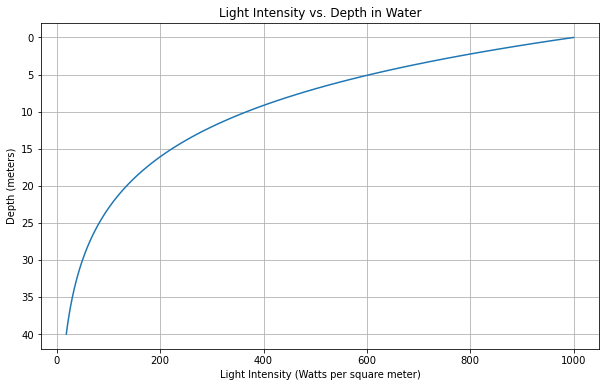

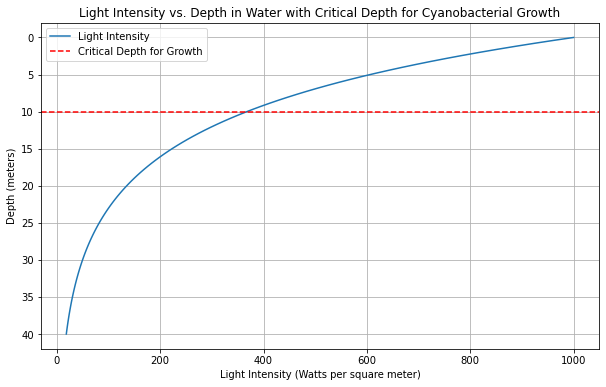

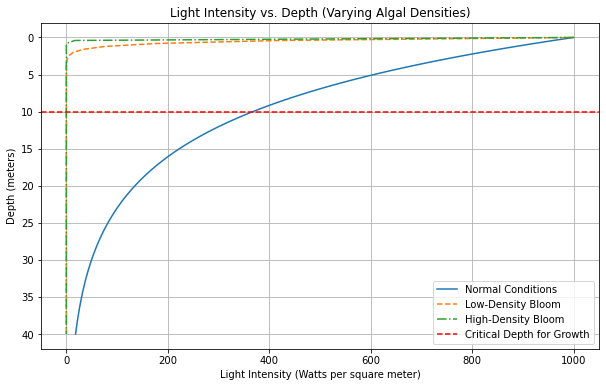

numerical integration (forward Euler) of Geffen's model for algae growth

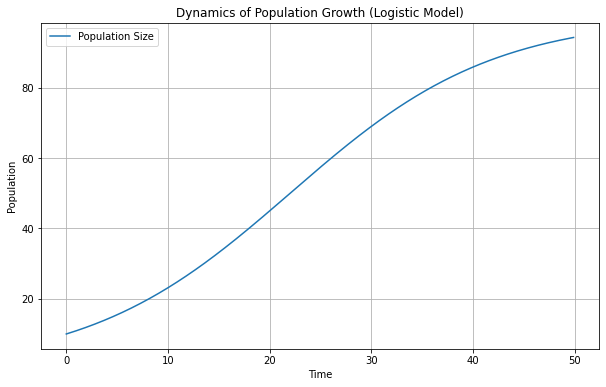

In [54]:
# basic population growth (logistic)

# initialize parameters
n_0 = 10  # initial population
r = 0.1  # intrinsic growth rate
K = 100  # carrying capacity (individuals)
dt = 0.1  # integration time step
total_time = 50  # total integration time

time = np.arange(0, total_time, dt)

# initialize population array
N = np.zeros(len(time))

# initial condition
N[0] = n_0

# Numerical integration using Euler's method
for t in range(1, len(time)):
    dN = r * N[t-1] * (1 - N[t-1]/K) * dt
    N[t] = N[t-1] + dN

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, N, label="Population Size")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Dynamics of Population Growth (Logistic Model)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# now with geffen's amendments

# initialize parameters
n_0 = 10  # initial population
r = 0.1  # intrinsic growth rate
K = 100  # carrying capacity (individuals)
dt = 0.1  # integration time step
total_time = 50  # total integration time

time = np.arange(0, total_time, dt)

# initialize population array
N = np.zeros(len(time))

# initial condition
N[0] = n_0

# Numerical integration using Euler's method
for t in range(1, len(time)):
    dN = r * N[t-1] * (1 - N[t-1]/K) * dt
    N[t] = N[t-1] + dN

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, N, label="Population Size")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Dynamics of Population Growth (Logistic Model)")
plt.legend()
plt.grid(True)
plt.show()


# phylo tree gen

In [45]:
def hamming_distance(str1, str2):
    """Calculate the Hamming distance between two strings."""
    assert len(str1) == len(str2), "strings must be of the same length"
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))

# make reproducible lol
np.random.seed(42)

def mutate_string(seq, mut):
    """Mutate a binary input string by flipping bits at a given mutation rate."""
    assert 0 <= mut <= 1, "mutation rate must be between 0 and 1"
    
    mutated = []
    for bit in seq:
        if np.random.rand() < mut:
            mutated.append('1' if bit == '0' else '0')
        else:
            mutated.append(bit)
    return ''.join(mutated)


n = 1000  # sequence length
wt = "0"*n

# dict of sample names and desired mutation rates
samples = {
    'Haiti': [0],
    'Nepal 1': [0.03],
    'Nepal 2': [0.03],
    'Bangladesh': [0.1],
    'Peru': [0.3],
}

# generate seq samples
for v in samples.values():
    v.append(mutate_string(wt, v[0]))
    
print(samples)

{'Haiti': [0, '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [46]:
def generate_matrix(inputdict):
    """of pairwise comparisons/SNPs"""
    labels = sorted(samples.keys())
    n = len(labels)
    
    mat = np.zeros((n,n), dtype=int)
    
    for i in range(n):
        for j in range(i+1, n):
            ham = hamming_distance(samples[labels[i]][1], samples[labels[j]][1])
            mat[i,j] = ham
            mat[j,i] = ham # symmetric
            
    return labels, mat 

axes, matrix = generate_matrix(samples)

print("Sample IDs:", axes)
print("Hamming Distance Matrix:\n", matrix)

Sample IDs: ['Bangladesh', 'Haiti', 'Nepal 1', 'Nepal 2', 'Peru']
Hamming Distance Matrix:
 [[  0 106 131 134 343]
 [106   0  27  34 303]
 [131  27   0  61 314]
 [134  34  61   0 321]
 [343 303 314 321   0]]


In [44]:
def check_triangle_inequality(mat):
    n = mat.shape[0]  # Number of samples
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if mat[i, k] > mat[i, j] + mat[j, k]:
                    return False  # Violates triangle inequality
    return True  # All distances are consistent

# Check for triangle inequality
is_consistent = check_triangle_inequality(matrix)
print("The matrix satisfies the triangle inequality:", is_consistent)


The matrix satisfies the triangle inequality: True


/tmp/ipykernel_454425/3895453539.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, 'average')


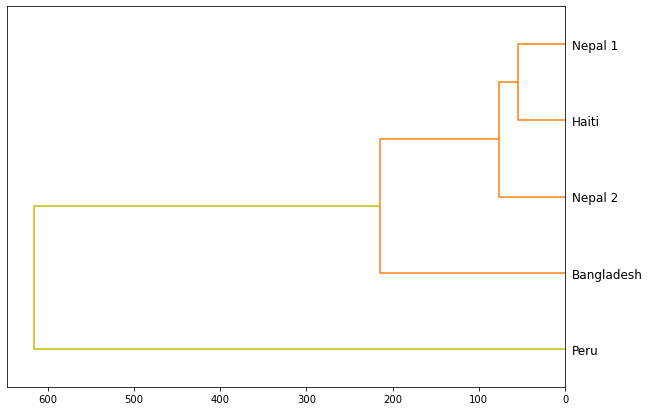

In [47]:
# imaging
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(matrix, 'average')

# Plot dendrogram, formatted similar to the example provided
plt.figure(figsize=(10, 7))
dendrogram(Z, orientation='left', labels=['Bangladesh', 'Haiti', 'Nepal 1', 'Nepal 2', 'Peru'], above_threshold_color='y')
plt.tick_params(axis='y', which='both', left=False, right=False)
plt.show()

